Acc Signal

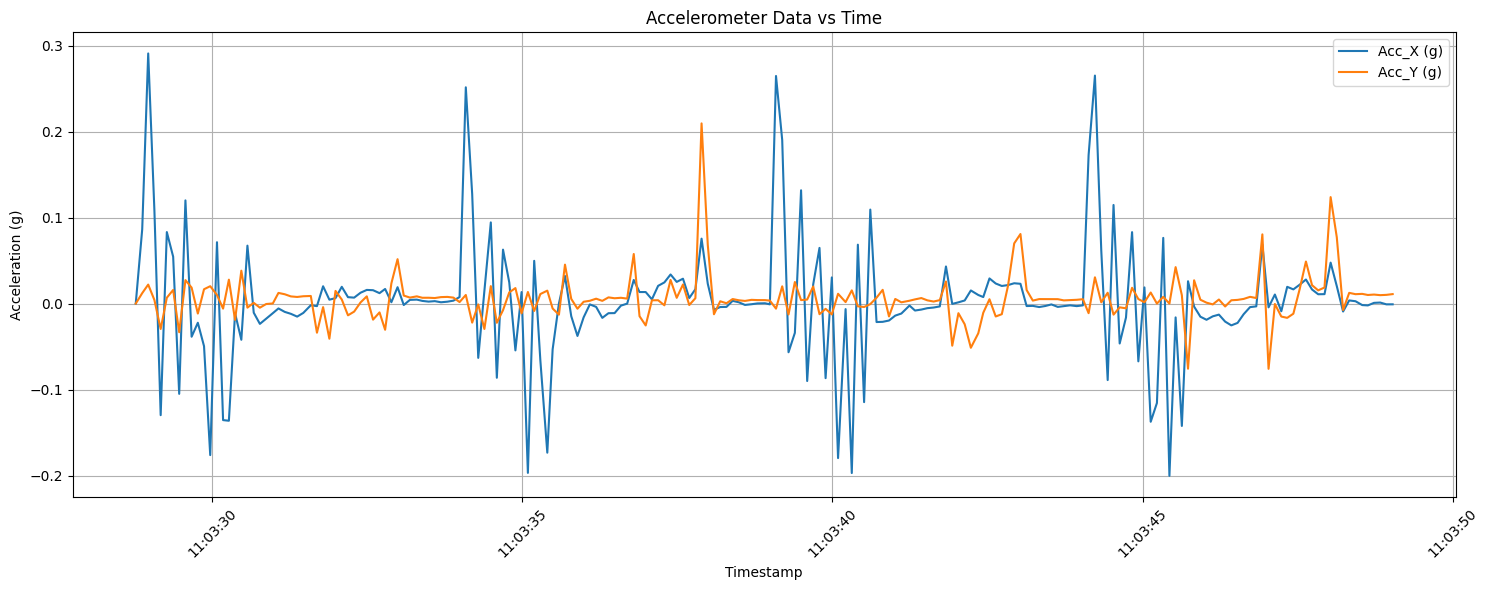

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_acc.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Acc_X, Acc_Y, Acc_Z ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Acc_X (g)'], label='Acc_X (g)')
plt.plot(df['Timestamp'], df['Acc_Y (g)'], label='Acc_Y (g)')
# plt.plot(df['Timestamp'], df['Acc_Z (g)'], label='Acc_Z (g)')

plt.xlabel('Timestamp')
plt.ylabel('Acceleration (g)')
plt.title('Accelerometer Data vs Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

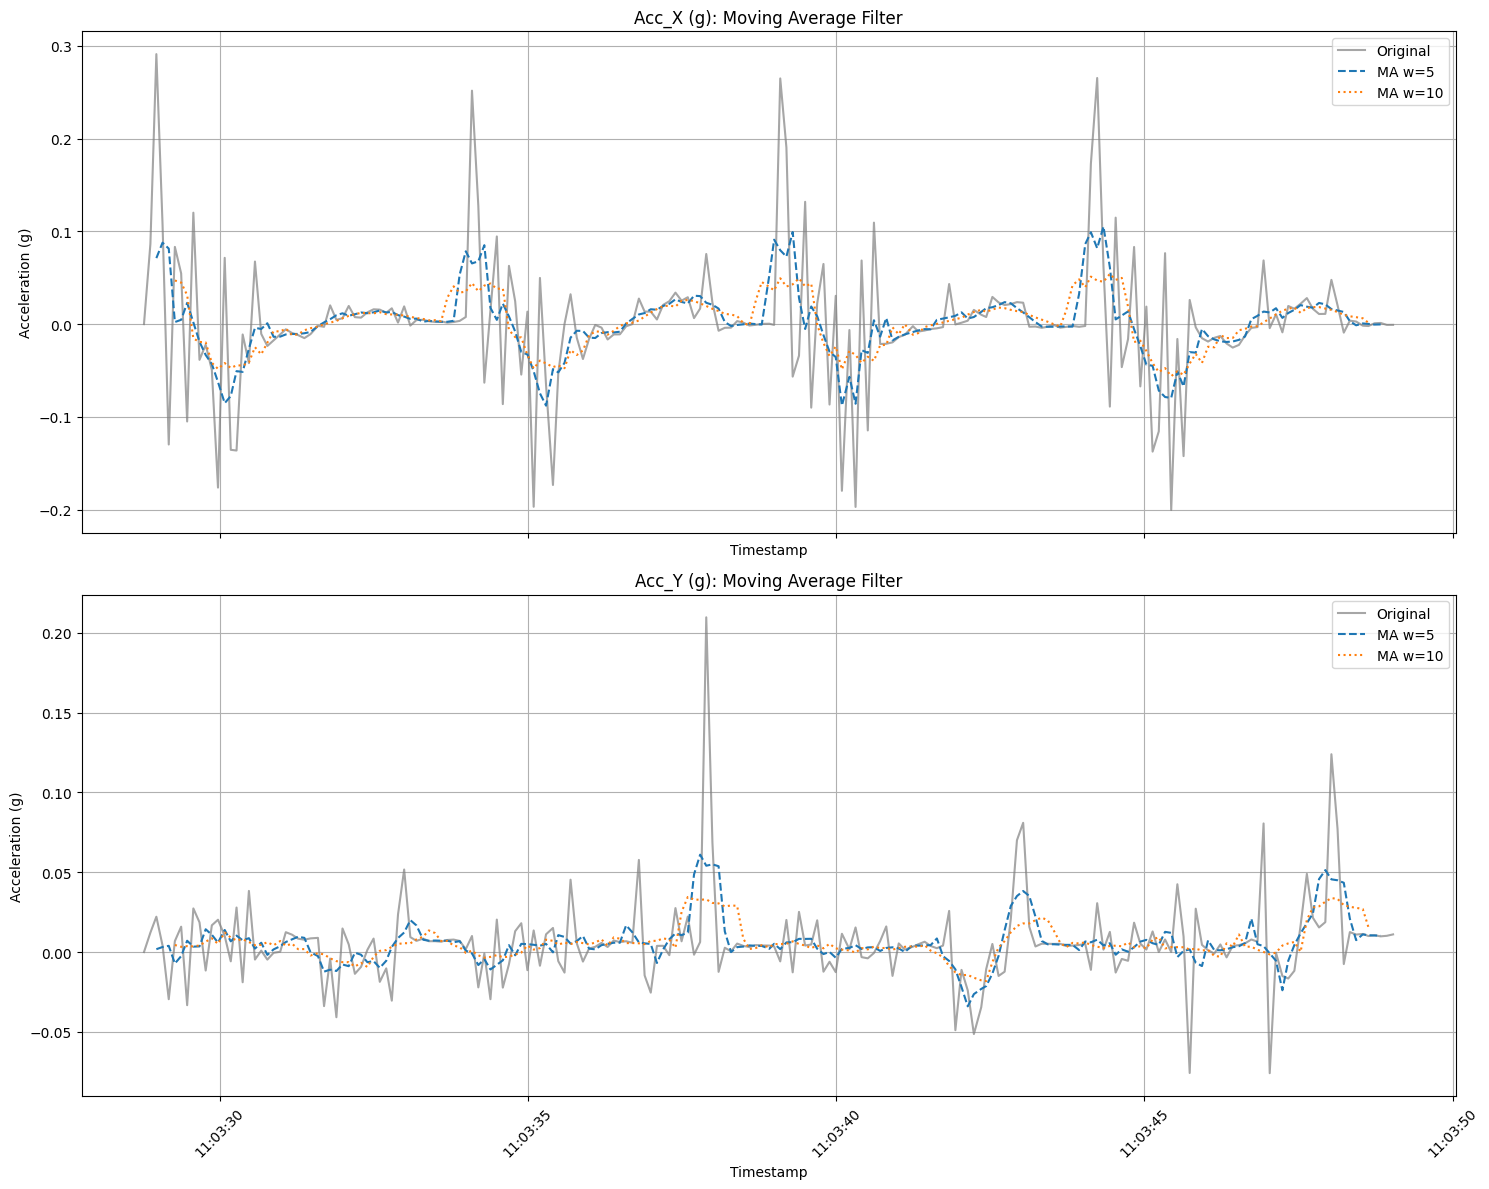

In [31]:
# MOving Average Filter

import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_acc.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

acc_cols = ['Acc_X (g)', 'Acc_Y (g)']
df_filtered = df.copy()

# Moving Average Filter
for col in acc_cols:
    df_filtered[f'{col}_MA_w5'] = df[col].rolling(window=5, center=True).mean()
    df_filtered[f'{col}_MA_w10'] = df[col].rolling(window=10, center=True).mean()


# สร้างกราฟแยกทีละแกน
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

for i, col in enumerate(acc_cols):
    axes[i].plot(df['Timestamp'], df[col], label='Original', color='gray', alpha=0.7)
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_MA_w5'], label='MA w=5', linestyle='--')
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_MA_w10'], label='MA w=10', linestyle=':')
    axes[i].set_title(f'{col}: Moving Average Filter')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Acceleration (g)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

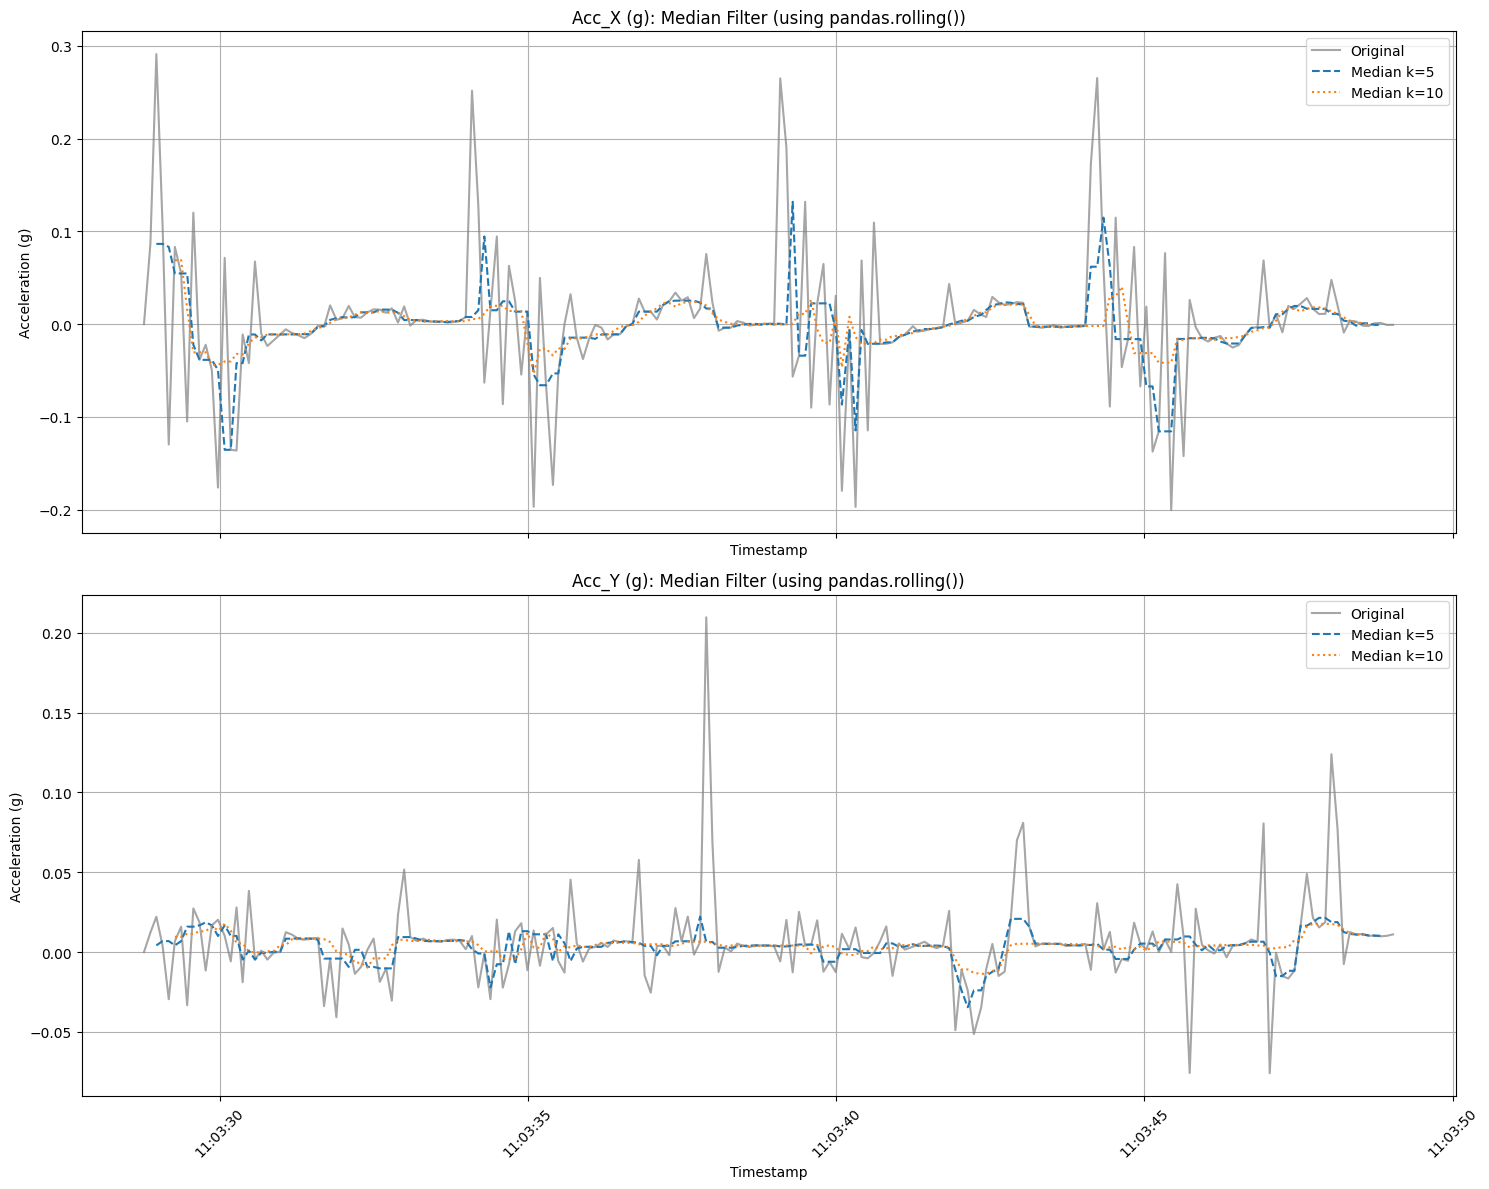

In [32]:
# · Median Filter (k=5,k=10)

import pandas as pd
import matplotlib.pyplot as plt
# ไม่ต้องใช้ from scipy.signal import medfilt ถ้าใช้ pandas.rolling().median()

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_acc.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

acc_cols = ['Acc_X (g)', 'Acc_Y (g)']

df_filtered = df.copy()

# Median Filter ใช้ pandas.rolling().median() แทน
for col in acc_cols:
    df_filtered[f'{col}_Median_k5'] = df[col].rolling(window=5, center=True).median()
    df_filtered[f'{col}_Median_k10'] = df[col].rolling(window=10, center=True).median() # ตรงนี้ใช้ k=10 ได้

# สร้างกราฟแยกทีละแกน
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

for i, col in enumerate(acc_cols):
    axes[i].plot(df['Timestamp'], df[col], label='Original', color='gray', alpha=0.7)
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_Median_k5'], label='Median k=5', linestyle='--')
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_Median_k10'], label='Median k=10', linestyle=':')
    axes[i].set_title(f'{col}: Median Filter (using pandas.rolling())')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Acceleration (g)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

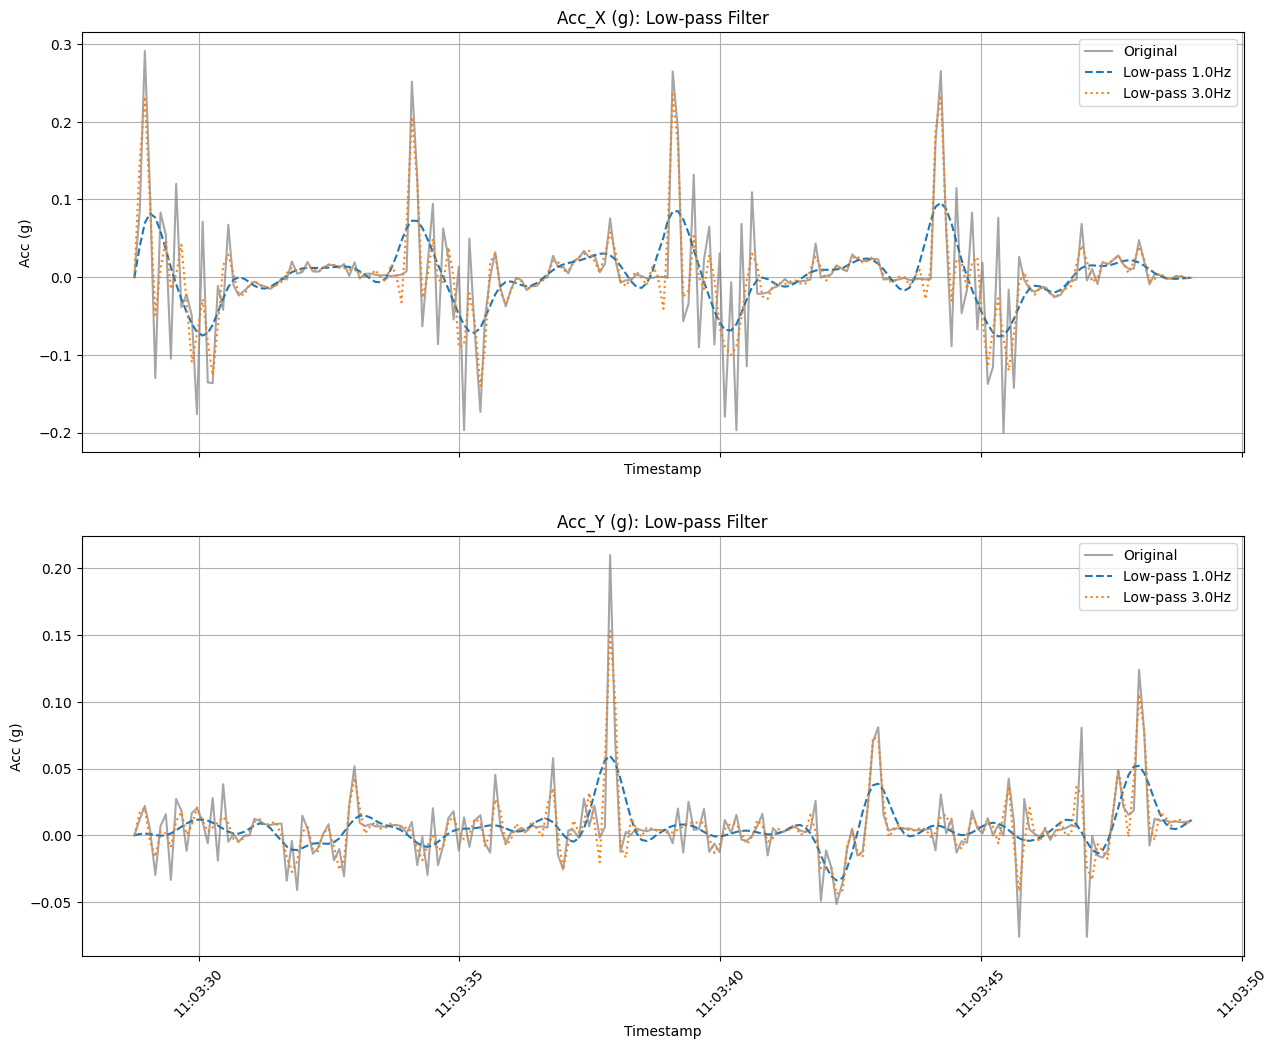

In [33]:
# · Low-pass Filter (Cutoff 1.0 Hz, 3.0Hz )

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_Acc.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

acc_cols = ['Acc_X (g)', 'Acc_Y (g)']

# กำหนด sampling rate (Hz)
dt = (df['Timestamp'][1] - df['Timestamp'][0]).total_seconds()
fs = 1.0 / dt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

df_filtered = df.copy()
for cutoff in [1.0, 3.0]:
    for col in acc_cols:
        df_filtered[f'{col}_LPF_{cutoff}Hz'] = butter_lowpass_filter(df[col], cutoff, fs)

# สร้างกราฟแยกทีละแกน
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
for i, col in enumerate(acc_cols):
    axes[i].plot(df['Timestamp'], df[col], label='Original', color='gray', alpha=0.7)
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_LPF_1.0Hz'], label='Low-pass 1.0Hz', linestyle='--')
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_LPF_3.0Hz'], label='Low-pass 3.0Hz', linestyle=':')
    axes[i].set_title(f'{col}: Low-pass Filter')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Acc (g)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

Gyro Signal

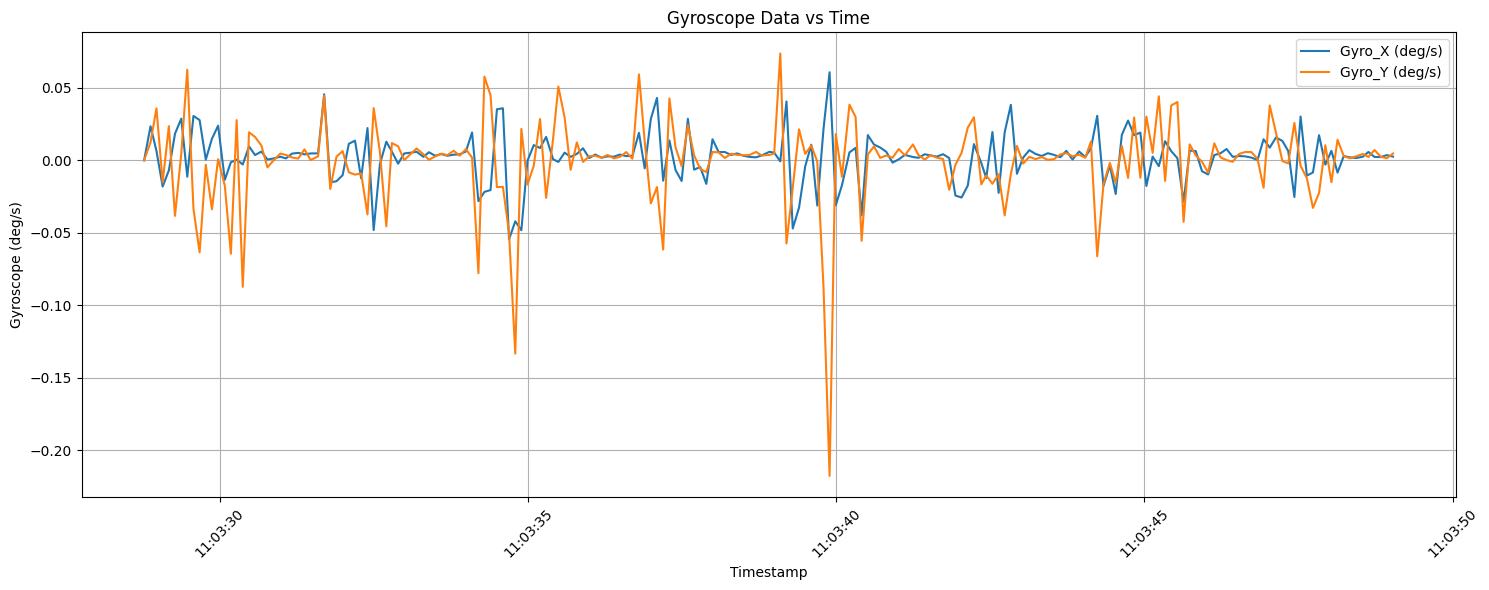

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_Gyro.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Gyro_X, Gyro_Y, Gyro_Z ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Gyro_X (deg/s)'], label='Gyro_X (deg/s)')
plt.plot(df['Timestamp'], df['Gyro_Y (deg/s)'], label='Gyro_Y (deg/s)')
# plt.plot(df['Timestamp'], df['Gyro_Z (deg/s)'], label='Gyro_Z (deg/s)')

plt.xlabel('Timestamp')
plt.ylabel('Gyroscope (deg/s)')
plt.title('Gyroscope Data vs Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

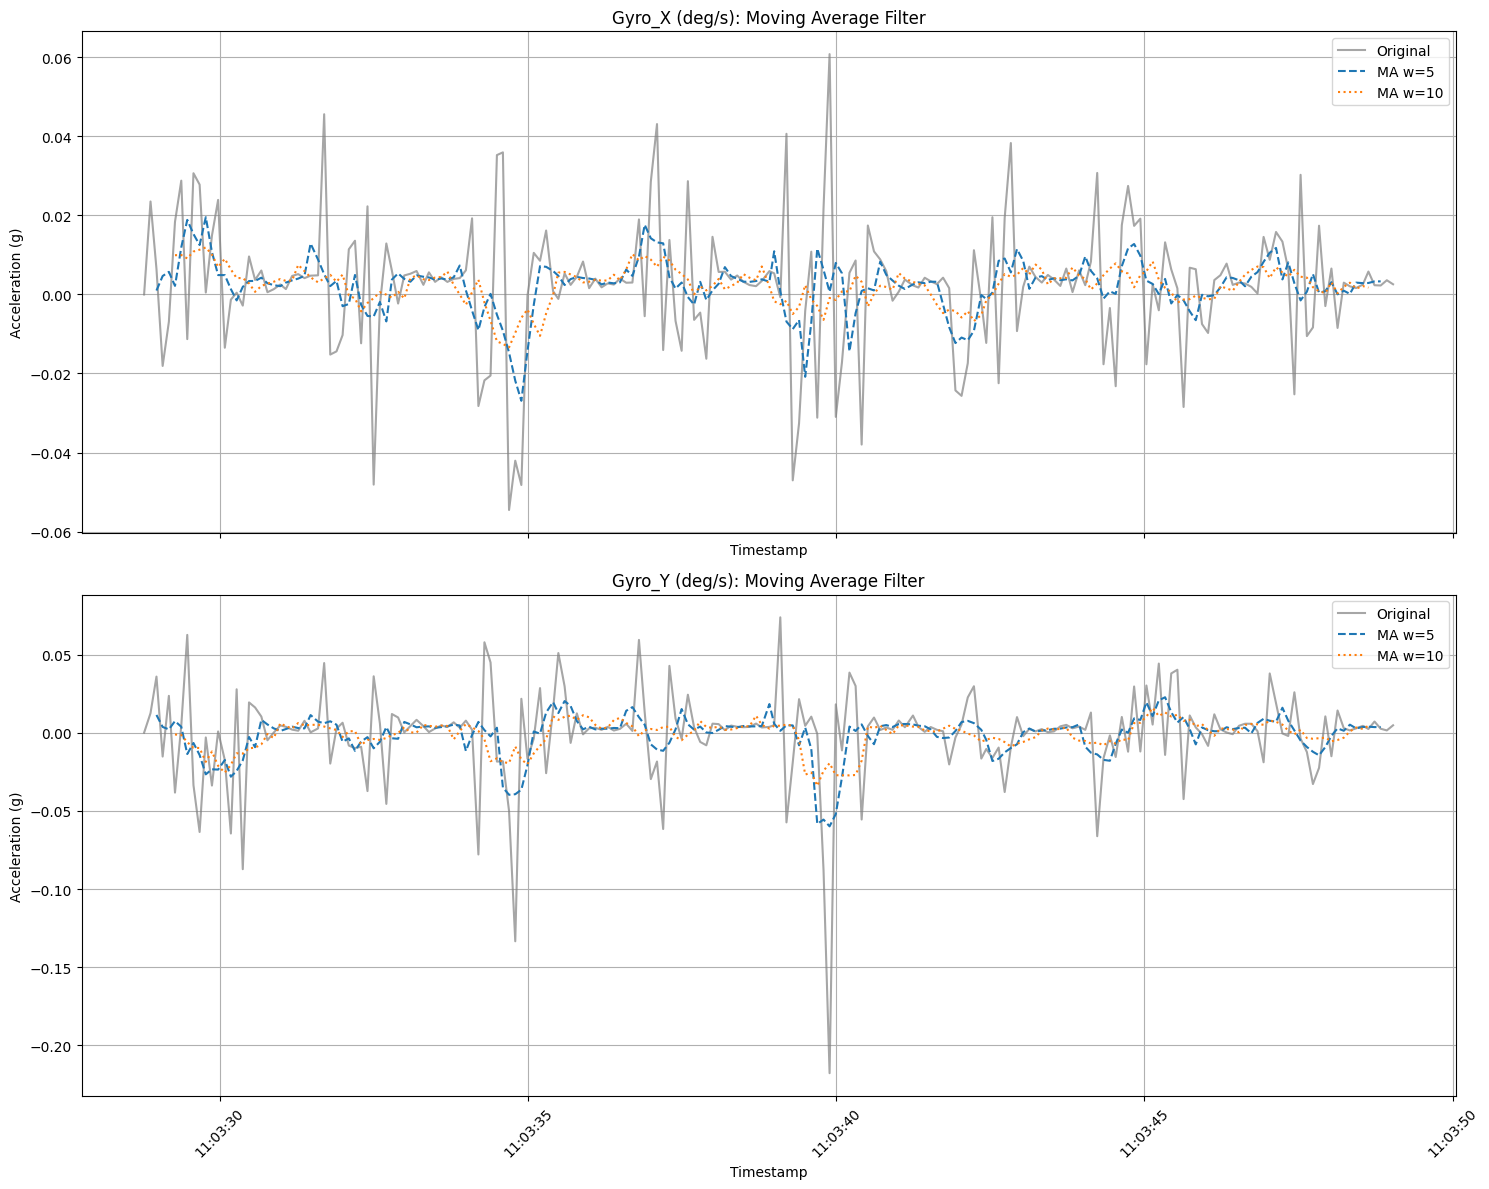

In [ ]:
# MOving Average Filter

import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_Gyro.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

acc_cols = ['Gyro_X (deg/s)', 'Gyro_Y (deg/s)']
df_filtered = df.copy()

# Moving Average Filter
for col in acc_cols:
    df_filtered[f'{col}_MA_w5'] = df[col].rolling(window=5, center=True).mean()
    df_filtered[f'{col}_MA_w10'] = df[col].rolling(window=10, center=True).mean()


# สร้างกราฟแยกทีละแกน
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

for i, col in enumerate(acc_cols):
    axes[i].plot(df['Timestamp'], df[col], label='Original', color='gray', alpha=0.7)
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_MA_w5'], label='MA w=5', linestyle='--')
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_MA_w10'], label='MA w=10', linestyle=':')
    axes[i].set_title(f'{col}: Moving Average Filter')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Acceleration (g)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

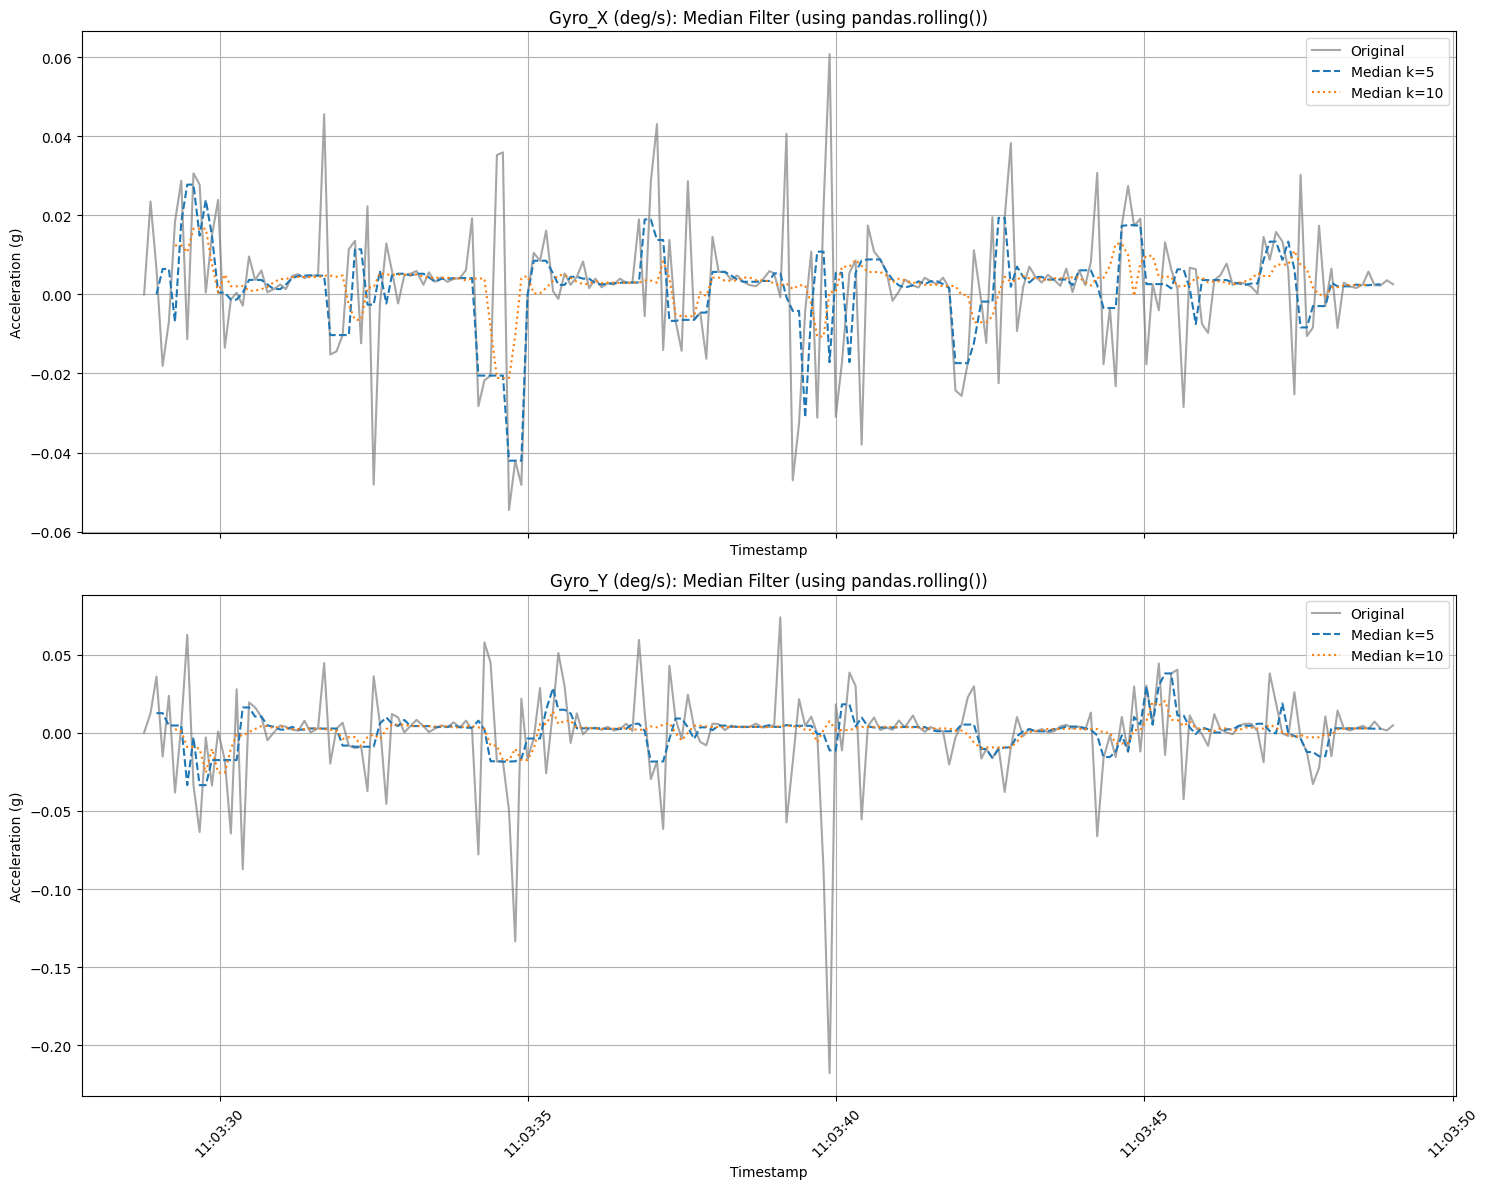

In [36]:
# · Median Filter (k=5,k=10)

import pandas as pd
import matplotlib.pyplot as plt
# ไม่ต้องใช้ from scipy.signal import medfilt ถ้าใช้ pandas.rolling().median()

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_Gyro.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

acc_cols = ['Gyro_X (deg/s)', 'Gyro_Y (deg/s)']

df_filtered = df.copy()

# Median Filter ใช้ pandas.rolling().median() แทน
for col in acc_cols:
    df_filtered[f'{col}_Median_k5'] = df[col].rolling(window=5, center=True).median()
    df_filtered[f'{col}_Median_k10'] = df[col].rolling(window=10, center=True).median() # ตรงนี้ใช้ k=10 ได้

# สร้างกราฟแยกทีละแกน
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

for i, col in enumerate(acc_cols):
    axes[i].plot(df['Timestamp'], df[col], label='Original', color='gray', alpha=0.7)
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_Median_k5'], label='Median k=5', linestyle='--')
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_Median_k10'], label='Median k=10', linestyle=':')
    axes[i].set_title(f'{col}: Median Filter (using pandas.rolling())')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Acceleration (g)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

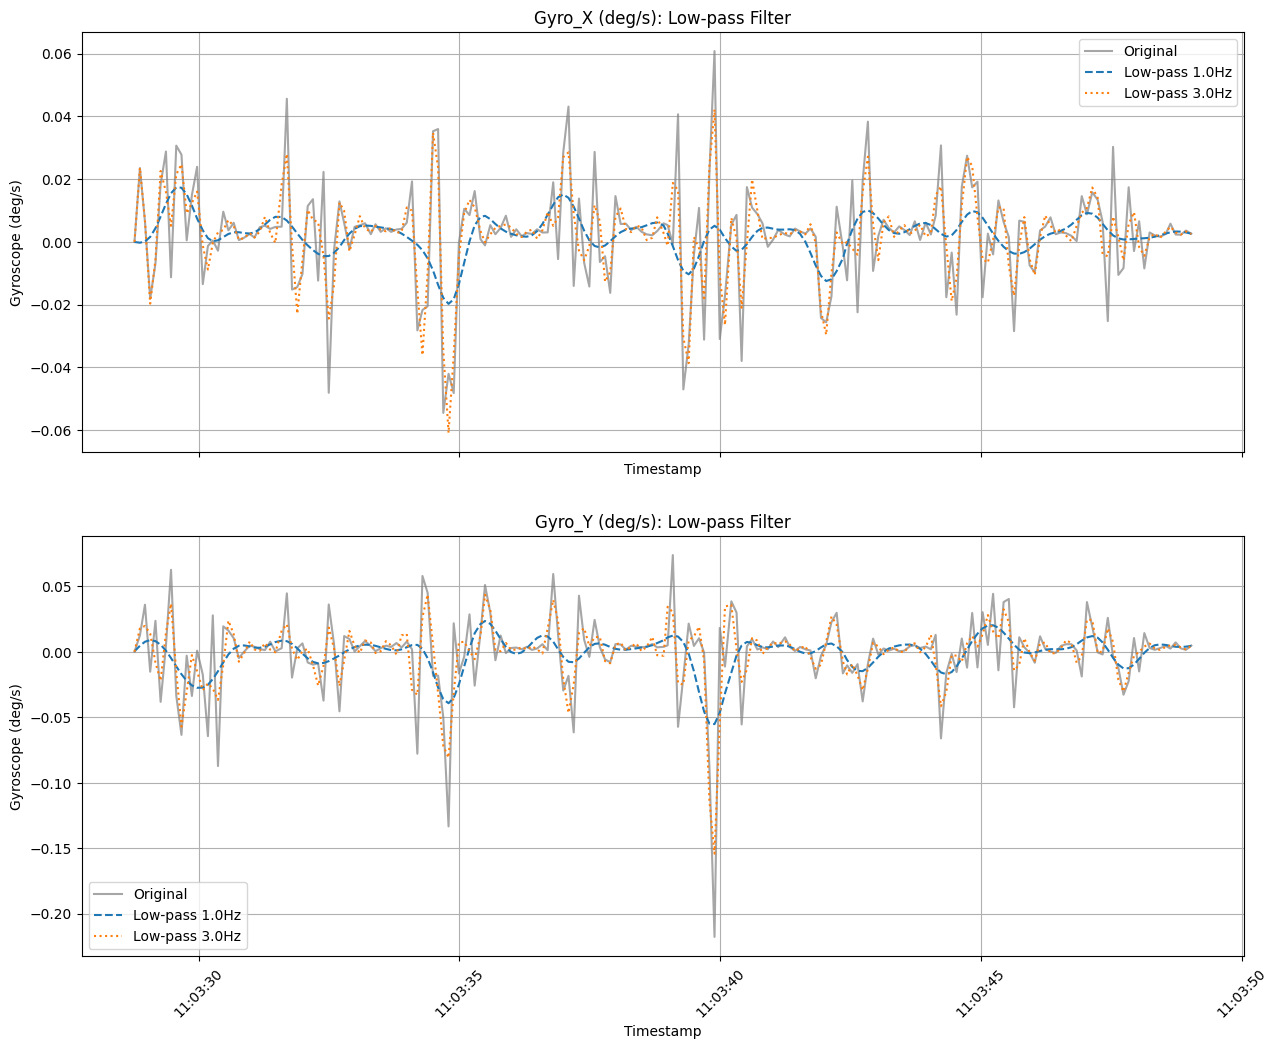

In [37]:
# · Low-pass Filter (Cutoff 1.0 Hz, 3.0Hz )

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_4_imu_Gyro.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

acc_cols = ['Gyro_X (deg/s)', 'Gyro_Y (deg/s)']

# กำหนด sampling rate (Hz)
dt = (df['Timestamp'][1] - df['Timestamp'][0]).total_seconds()
fs = 1.0 / dt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

df_filtered = df.copy()
for cutoff in [1.0, 3.0]:
    for col in acc_cols:
        df_filtered[f'{col}_LPF_{cutoff}Hz'] = butter_lowpass_filter(df[col], cutoff, fs)

# สร้างกราฟแยกทีละแกน
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
for i, col in enumerate(acc_cols):
    axes[i].plot(df['Timestamp'], df[col], label='Original', color='gray', alpha=0.7)
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_LPF_1.0Hz'], label='Low-pass 1.0Hz', linestyle='--')
    axes[i].plot(df_filtered['Timestamp'], df_filtered[f'{col}_LPF_3.0Hz'], label='Low-pass 3.0Hz', linestyle=':')
    axes[i].set_title(f'{col}: Low-pass Filter')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel('Gyroscope (deg/s)')
    axes[i].legend()
    axes[i].grid(True)
    axes[i].tick_params(axis='x', rotation=45)